In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import datetime
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('./raw_data/xtrain.csv', names=['Verdict', "Text"])
X = train['Text']
y= train['Verdict']

x_train = X
y_train = y

In [2]:
import pickle
train_df = pd.read_pickle("./pickles/compiled.pkl")
test_df = pd.read_pickle("./pickles/compiled_test.pkl")
train_df = train_df.loc[:,~train_df.columns.duplicated()].copy()

In [7]:
# vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(train_df['Text'])
y_train = train_df['Verdict']

x_test = vectorizer.transform(test_df['Text'])
y_test = test_df['Verdict']

clf = LogisticRegression()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.79      0.68      0.73       750
           2       0.77      0.47      0.58       750
           3       0.54      0.63      0.58       750
           4       0.66      0.91      0.77       750

    accuracy                           0.67      3000
   macro avg       0.69      0.67      0.66      3000
weighted avg       0.69      0.67      0.66      3000



/opt/homebrew/Caskroom/miniconda/base/envs/cs4248/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
print(f1_score(y_test, y_pred, average='macro'))

0.6646315205613114


In [9]:
# print misclassfied examples
labels = {1: 'Satire', 2: 'Hoax', 3: 'Propaganda', 4: 'Reliable News'}
test_df["predicted"] = y_pred
misclassified = test_df[test_df["Verdict"] != test_df["predicted"]]
for i in range(1,5):
    misclassified_i =  misclassified[misclassified['Verdict'] == i]
    print(f'Class {i} ({labels[i]}) misclassified: {len(misclassified_i)}')
    for j in range(1,5):
        if i == j:
            continue
        print(f'Mispredicted as class {j} ({labels[j]}): {len(misclassified_i[misclassified_i["predicted"] == j])}')
    print('')

Class 1 (Satire) misclassified: 242
Mispredicted as class 2 (Hoax): 93
Mispredicted as class 3 (Propaganda): 59
Mispredicted as class 4 (Reliable News): 90

Class 2 (Hoax) misclassified: 398
Mispredicted as class 1 (Satire): 35
Mispredicted as class 3 (Propaganda): 305
Mispredicted as class 4 (Reliable News): 58

Class 3 (Propaganda) misclassified: 281
Mispredicted as class 1 (Satire): 69
Mispredicted as class 2 (Hoax): 9
Mispredicted as class 4 (Reliable News): 203

Class 4 (Reliable News) misclassified: 67
Mispredicted as class 1 (Satire): 34
Mispredicted as class 2 (Hoax): 1
Mispredicted as class 3 (Propaganda): 32



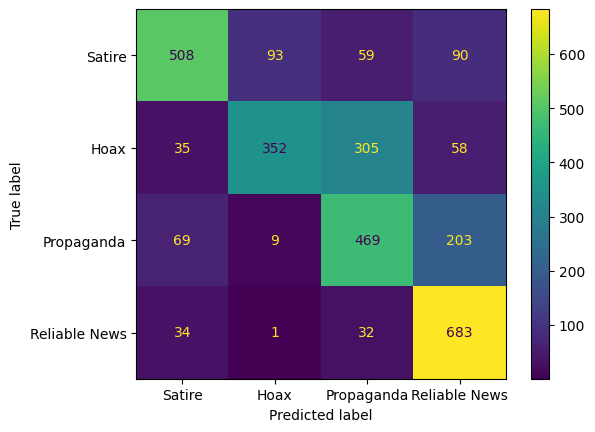

In [10]:
#print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.values())
disp.plot()